In [The Mean and Slopes](mean_and_slopes), we were looking for the best slope
to predict one vector of values from another vector of values.

Specifically, we wanted our slope to predict the Maternal Mortality Ratio (MMR) values from the Fertility Rate (FR) values.

By analogy with [The Mean as Predictor](mean_meaning), we decided to choose our line to minimize the average prediction errors, and the sum of squared prediction errors.

We found a solution.  Now we might ask the question, what if we wanted a line that had a (not zero) intercept, as well as a slope?

First we recover the slope we found.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# Make plots look a little bit more fancy
plt.style.use('fivethirtyeight')
# Print to 2 decimal places, show tiny values as 0
np.set_printoptions(precision=2, suppress=True)
import pandas as pd

If you are running on your laptop, you will need to download the
[gender_stats.csv]({{ site.baseurl }}/data/gender_stats.csv) file to the same
directory as this notebook.

We fetch the data and process it again:

In [2]:
# Load the data file
gender_data = pd.read_csv('gender_stats.csv')

# Make new data frame with only MMR and FR
just_mmr_fr = gender_data[['mat_mort_ratio', 'fert_rate']]

# Drop the NaN values, and make into arrays.
clean_mmr_fr = just_mmr_fr.dropna()
mmr = np.array(clean_mmr_fr['mat_mort_ratio'])
fert = np.array(clean_mmr_fr['fert_rate'])

We decided on sum of squared error as a criterion:

In [3]:
def sos_error(slope):
    fitted = fert * slope  # 'fert' comes from the top level
    error = mmr - fitted     # 'mmr' comes from the top level
    return np.sum(error ** 2)

We tried many slopes, and found the one minimizing the `sos_error` value
above:

In [4]:
# Slopes to try
some_slopes = np.arange(50, 110, 0.1)
n_slopes = len(some_slopes)
# Try all these slopes, calculate and record sum of squared error
sos_errors = np.zeros(n_slopes)
for i in np.arange(n_slopes):
    slope = some_slopes[i]
    sos_errors[i] = sos_error(slope)
# The slope minimizing the sum of squared error
best_slope = some_slopes[np.argmin(sos_errors)]
best_slope

77.8000000000004

This all comes from the [The Mean and Slopes](mean_and_slopes) notebook.

We also found, mysteriously, that there was a function called `minimize` in
Scipy that would do the search for us:

In [5]:
from scipy.optimize import minimize
minimize(sos_error, 100)

      fun: 5901406.206272444
 hess_inv: array([[0.]])
      jac: array([0.])
  message: 'Optimization terminated successfully.'
     nfev: 15
      nit: 3
     njev: 5
   status: 0
  success: True
        x: array([77.84])

We now how to search for the best slope.  What if we also have a not-zero intercept.  How do we search for a slope as well as an intercept?

In [6]:
def sos_si_error(inter_slope):
    intercept = inter_slope[0]
    slope = inter_slope[1]
    fitted = intercept + fert * slope
    error = mmr - fitted
    return np.sum(error ** 2)

In [7]:
sos_si_error([0, best_slope])

5901409.5805078605

In [8]:
sos_si_error([-100, 100])

4516702.759643463

In [9]:
some_intercepts = np.arange(-300, 50)
n_intercepts = len(some_intercepts)
some_slopes = np.arange(0, 200)
n_slopes = len(some_slopes)

In [10]:
errors = np.zeros((n_intercepts, n_slopes))
for inter_i in np.arange(n_intercepts):
    inter = some_intercepts[inter_i]
    for slope_i in np.arange(n_slopes):
        s = some_slopes[slope_i]
        errors[inter_i, slope_i] = sos_si_error([inter, s])

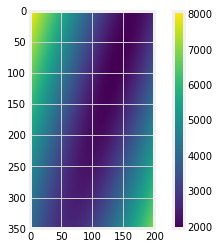

In [11]:
plt.imshow(np.sqrt(errors))
plt.colorbar()

In [12]:
min_error = np.min(errors)
min_error

3798981.48102873

In [13]:
rows, cols = np.where(errors == min_error)
rows, cols

(array([80]), array([140]))

In [14]:
best_intercept = some_intercepts[rows]
best_intercept

array([-220])

In [15]:
best_si_slope = some_slopes[cols]
best_si_slope

array([140])

[0, 8, -200, 1500]

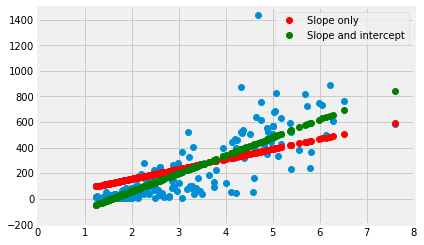

In [16]:
si_predicted = best_intercept + fert * best_si_slope
just_s_predicted = fert * best_slope
plt.plot(fert, mmr, 'o')
plt.plot(fert, just_s_predicted, 'o', color='red', label='Slope only')
plt.plot(fert, si_predicted, 'o', color='green', label='Slope and intercept')
plt.legend()
plt.axis([0, 8, -200, 1500])

In [17]:
minimize(sos_si_error, [0, 0])

      fun: 3798879.4982325537
 hess_inv: array([[ 0., -0.],
       [-0.,  0.]])
      jac: array([-0.03, -0.06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 69
      nit: 7
     njev: 17
   status: 2
  success: False
        x: array([-220.86,  140.42])

In [18]:
from scipy.stats import linregress

In [19]:
linregress(fert, mmr)

LinregressResult(slope=140.4171171547987, intercept=-220.8570729056681, rvalue=0.8327335391716736, pvalue=3.3173289077823836e-60, stderr=6.196624287694138)